<a href="https://colab.research.google.com/github/boomikaak21-sketch/vtu22931_Smart-City-Air-Quality-Monitoring-/blob/main/22931_DV_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

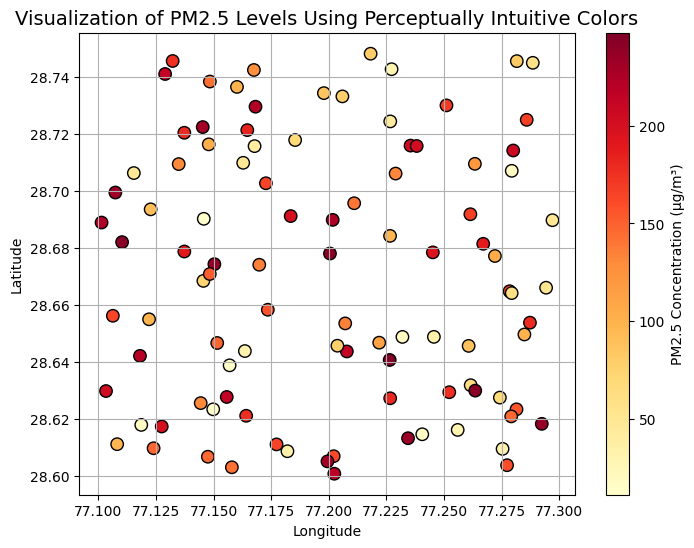

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
np.random.seed(42)
data = {
    'latitude': np.random.uniform(28.6, 28.75, 100),
    'longitude': np.random.uniform(77.1, 77.3, 100),
    'PM2.5': np.random.uniform(10, 250, 100)
}

df = pd.DataFrame(data)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
plt.figure(figsize=(8,6))
sc = plt.scatter(gdf['longitude'], gdf['latitude'],
                 c=gdf['PM2.5'], cmap='YlOrRd', s=80, edgecolor='black')

plt.colorbar(sc, label='PM2.5 Concentration (µg/m³)')
plt.title("Visualization of PM2.5 Levels Using Perceptually Intuitive Colors", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


/tmp/ipython-input-530157213.py:19: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





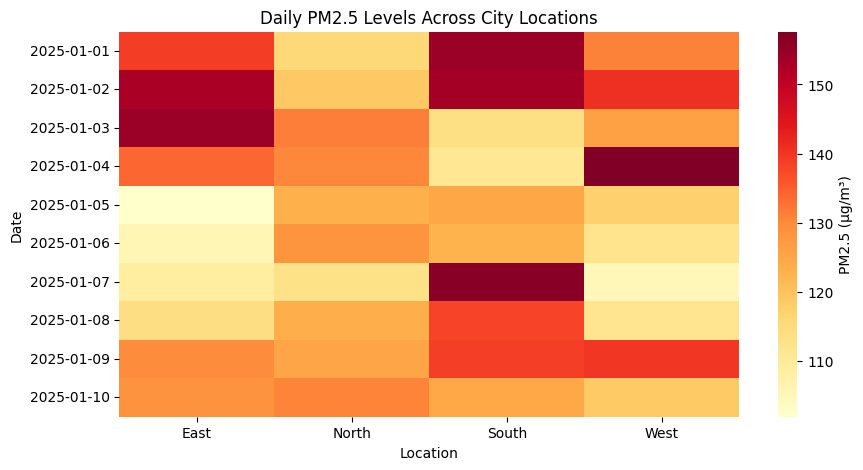

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
np.random.seed(42)
timestamps = pd.date_range("2025-01-01", periods=240, freq="h")
locations = ['North', 'South', 'East', 'West']
data = {
    'timestamp': np.tile(timestamps, len(locations)),
    'location': np.repeat(locations, len(timestamps)),
    'PM2.5': np.random.uniform(10, 250, len(timestamps)*len(locations)),
    'NO2': np.random.uniform(5, 120, len(timestamps)*len(locations)),
    'traffic_level': np.random.randint(1, 5, len(timestamps)*len(locations))
}
df_raw = pd.DataFrame(data)
df = df_raw.copy()
df.loc[np.random.choice(df.index, 50), 'PM2.5'] = np.nan
df['PM2.5'].fillna(df['PM2.5'].mean(), inplace=True)
df = df[df['PM2.5'] < 300]
df['date'] = pd.to_datetime(df['timestamp']).dt.date
daily_avg = df.groupby(['date', 'location']).agg({
    'PM2.5': 'mean',
    'NO2': 'mean',
    'traffic_level': 'mean'
}).reset_index()
pivot = daily_avg.pivot(index='date', columns='location', values='PM2.5')
plt.figure(figsize=(10,5))
sns.heatmap(pivot, cmap='YlOrRd', cbar_kws={'label':'PM2.5 (µg/m³)'})
plt.title("Daily PM2.5 Levels Across City Locations")
plt.xlabel("Location")
plt.ylabel("Date")
plt.show()
fig = px.line(
    daily_avg,
    x='date',
    y='PM2.5',
    color='location',
    title='PM2.5 Trends Across Locations',
    markers=True,
    labels={'PM2.5':'PM2.5 (µg/m³)', 'date':'Date'}
)
fig.show()



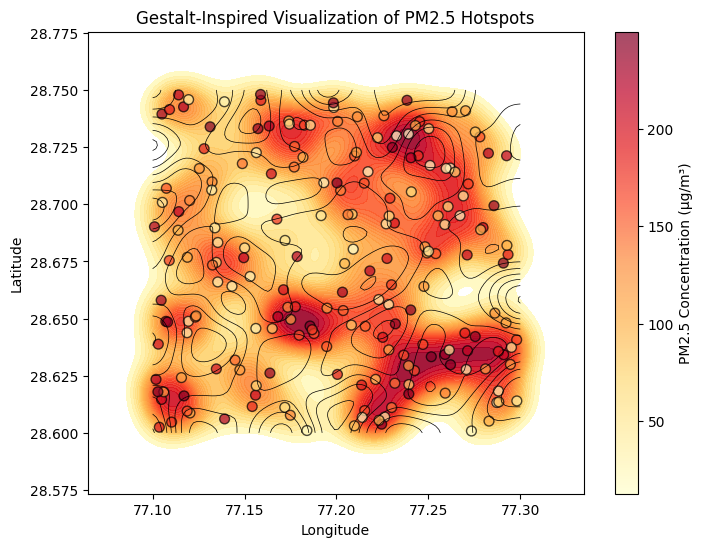

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import seaborn as sns
np.random.seed(42)
n_points = 200
data = {
    'latitude': np.random.uniform(28.6, 28.75, n_points),
    'longitude': np.random.uniform(77.1, 77.3, n_points),
    'PM2.5': np.random.uniform(10, 250, n_points)
}
df = pd.DataFrame(data)
grid_x, grid_y = np.mgrid[28.6:28.75:100j, 77.1:77.3:100j]
pm25_grid = gaussian_filter(np.random.uniform(10, 250, grid_x.shape), sigma=5)

plt.figure(figsize=(8,6))
sns.kdeplot(
    x=df['longitude'], y=df['latitude'],
    fill=True, cmap="YlOrRd", bw_adjust=0.5, levels=30,
    alpha=0.9, thresh=0.05
)

contours = plt.contour(grid_y, grid_x, pm25_grid, levels=8, colors='black', linewidths=0.5)
plt.scatter(df['longitude'], df['latitude'], c=df['PM2.5'], cmap='YlOrRd',
            s=50, edgecolor='black', alpha=0.7)

plt.colorbar(label='PM2.5 Concentration (µg/m³)')
plt.title("Gestalt-Inspired Visualization of PM2.5 Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(False)
plt.show()


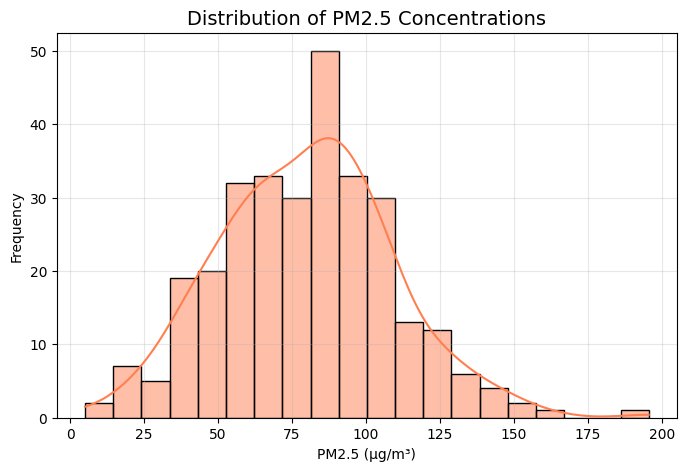

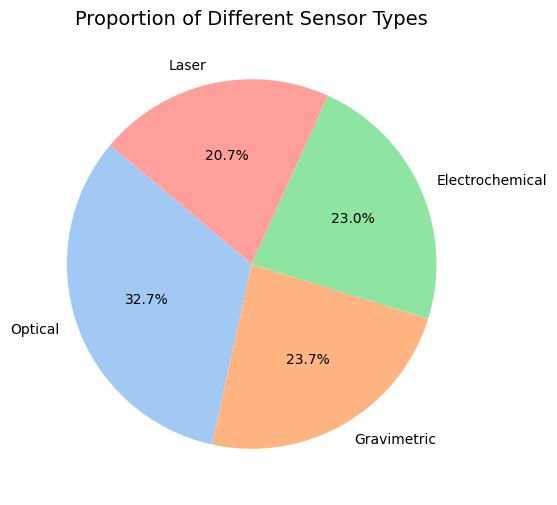

✅ Histogram saved at: PM25_histogram_output.png
✅ Pie chart saved at: SensorType_piechart_output.png


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1️⃣ Simulate Sample Dataset
# -----------------------------
np.random.seed(42)
n = 300
data = {
    'PM2.5': np.random.normal(80, 30, n).clip(5, 250),
    'sensor_type': np.random.choice(['Optical', 'Laser', 'Electrochemical', 'Gravimetric'], n)
}
df = pd.DataFrame(data)

# -----------------------------
# 2️⃣ (a) Histogram of PM2.5
# -----------------------------
plt.figure(figsize=(8,5))
sns.histplot(df['PM2.5'], bins=20, kde=True, color='coral')
plt.title("Distribution of PM2.5 Concentrations", fontsize=14)
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
hist_output = "PM25_histogram_output.png"
plt.savefig(hist_output, bbox_inches="tight")
plt.show()
plt.figure(figsize=(6,6))
sensor_counts = df['sensor_type'].value_counts()
plt.pie(sensor_counts, labels=sensor_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette("pastel"), startangle=140)
plt.title("Proportion of Different Sensor Types", fontsize=14)
pie_output = "SensorType_piechart_output.png"
plt.savefig(pie_output, bbox_inches="tight")
plt.show()
print("✅ Histogram saved at:", hist_output)
print("✅ Pie chart saved at:", pie_output)


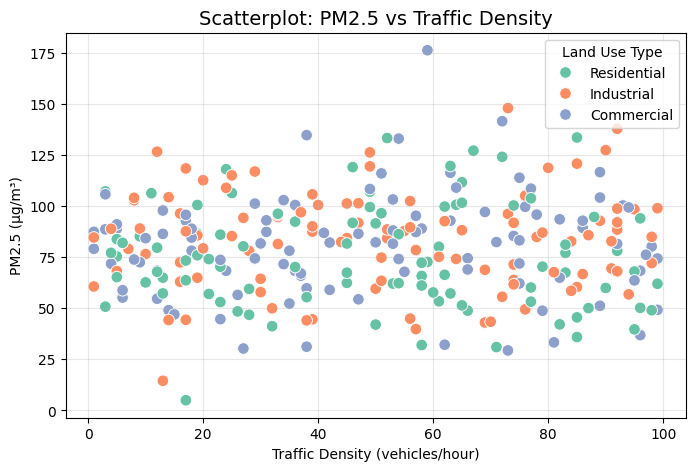

/tmp/ipython-input-3113975110.py:41: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




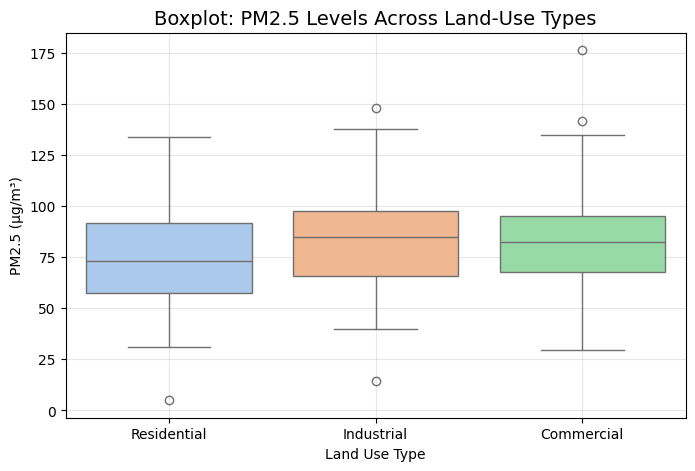

✅ Scatterplot saved at: PM25_vs_TrafficDensity.png
✅ Boxplot saved at: PM25_Boxplot_LandUse.png


In [ ]:
# =====================================
# Bivariate Analysis of Air Quality Data
# =====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1️⃣ Simulate Sample Dataset
# -----------------------------
np.random.seed(42)
n = 300
data = {
    'PM2.5': np.random.normal(80, 25, n).clip(5, 250),
    'traffic_density': np.random.randint(1, 100, n),
    'land_use': np.random.choice(['Residential', 'Industrial', 'Commercial'], n)
}
df = pd.DataFrame(data)

# -----------------------------
# 2️⃣ (a) Scatterplot: PM2.5 vs Traffic Density
# -----------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='traffic_density', y='PM2.5', hue='land_use', palette='Set2', s=70)
plt.title("Scatterplot: PM2.5 vs Traffic Density", fontsize=14)
plt.xlabel("Traffic Density (vehicles/hour)")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend(title='Land Use Type')
plt.grid(True, alpha=0.3)

scatter_output = "PM25_vs_TrafficDensity.png"
plt.savefig(scatter_output, bbox_inches="tight")
plt.show()

# -----------------------------
# 3️⃣ (b) Box Plot: PM2.5 Across Land-Use Types
# -----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='land_use', y='PM2.5', palette='pastel')
plt.title("Boxplot: PM2.5 Levels Across Land-Use Types", fontsize=14)
plt.xlabel("Land Use Type")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True, alpha=0.3)

box_output = "PM25_Boxplot_LandUse.png"
plt.savefig(box_output, bbox_inches="tight")
plt.show()

print("✅ Scatterplot saved at:", scatter_output)
print("✅ Boxplot saved at:", box_output)


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has b

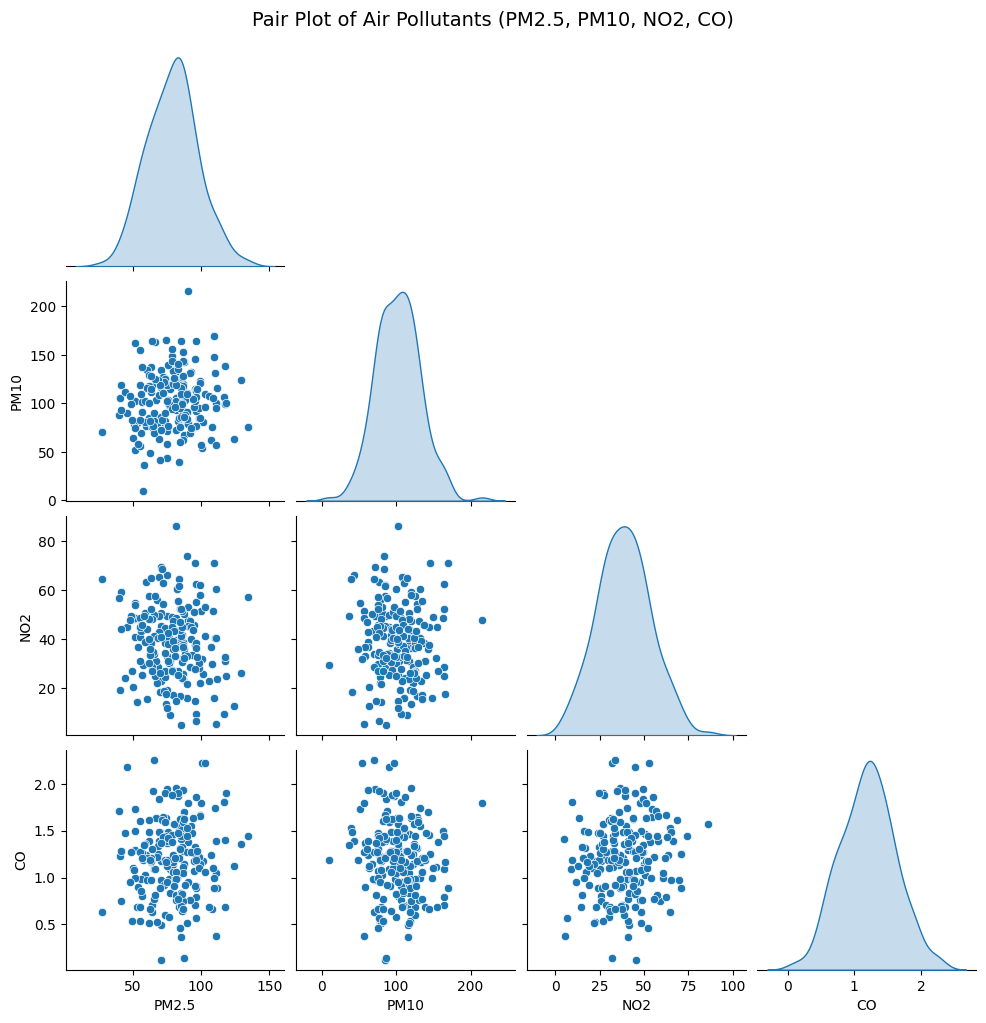

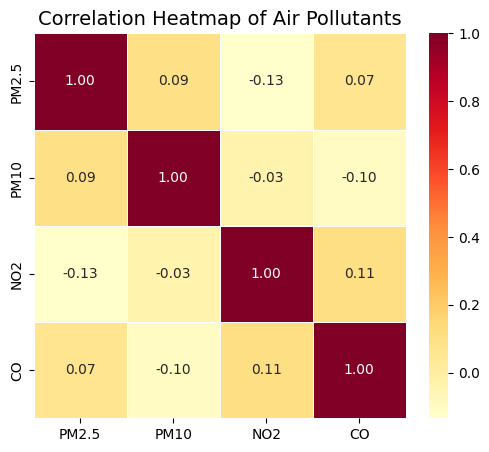

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has b

✅ Pair plot saved as: PairPlot_AirPollutants.png
✅ Heatmap saved as: Heatmap_AirPollutants.png


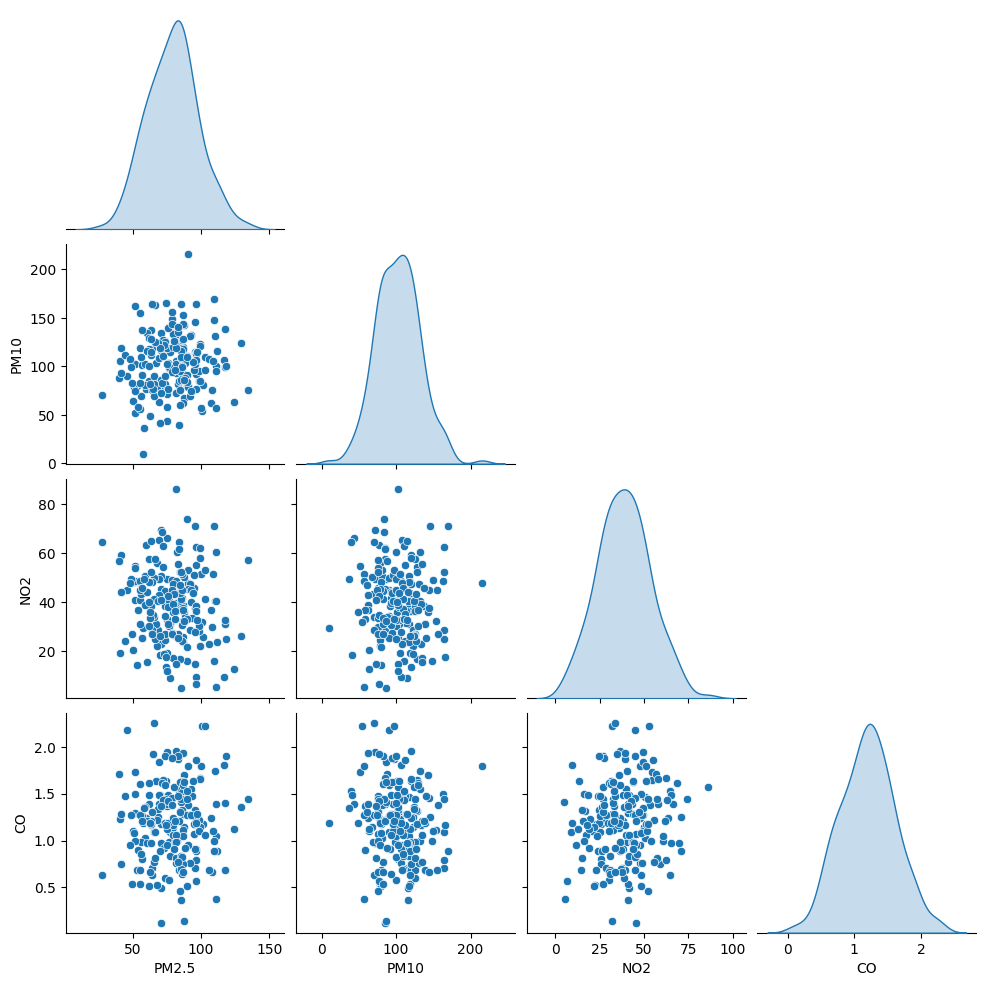

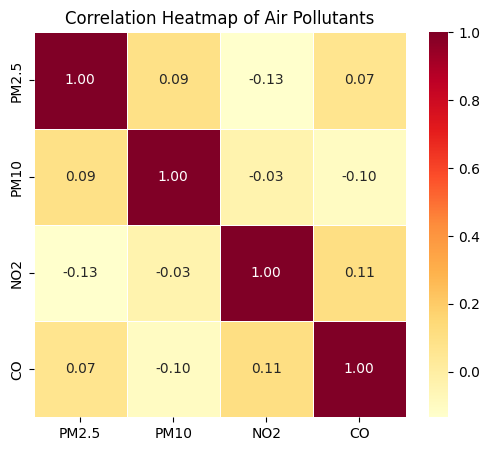

In [ ]:
# ======================================
# Multivariate Analysis of Air Quality Data
# ======================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Create a Simulated Dataset
# -----------------------------
np.random.seed(42)
n = 200
df = pd.DataFrame({
    'PM2.5': np.random.normal(80, 20, n).clip(5, 250),
    'PM10': np.random.normal(100, 30, n).clip(10, 300),
    'NO2': np.random.normal(40, 15, n).clip(5, 120),
    'CO': np.random.normal(1.2, 0.4, n).clip(0.1, 3.0),
    'traffic_density': np.random.randint(10, 100, n),
    'land_use': np.random.choice(['Residential', 'Industrial', 'Commercial'], n)
})

# -----------------------------
# 2️⃣ (a) Pair Plot (Scatterplot Matrix)
# -----------------------------
sns.pairplot(df[['PM2.5', 'PM10', 'NO2', 'CO']], diag_kind='kde', corner=True, palette='viridis')
plt.suptitle("Pair Plot of Air Pollutants (PM2.5, PM10, NO2, CO)", y=1.02, fontsize=14)
plt.show()

# -----------------------------
# 3️⃣ (b) Combined Visualization: Correlation Heatmap
# -----------------------------
corr = df[['PM2.5', 'PM10', 'NO2', 'CO']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Air Pollutants", fontsize=14)
plt.show()

# -----------------------------
# 4️⃣ Save Outputs (Optional)
# -----------------------------
pairplot_output = "PairPlot_AirPollutants.png"
heatmap_output = "Heatmap_AirPollutants.png"

sns.pairplot(df[['PM2.5', 'PM10', 'NO2', 'CO']], diag_kind='kde', corner=True, palette='viridis').savefig(pairplot_output, bbox_inches="tight")
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Air Pollutants")
plt.savefig(heatmap_output, bbox_inches="tight")

print("✅ Pair plot saved as:", pairplot_output)
print("✅ Heatmap saved as:", heatmap_output)


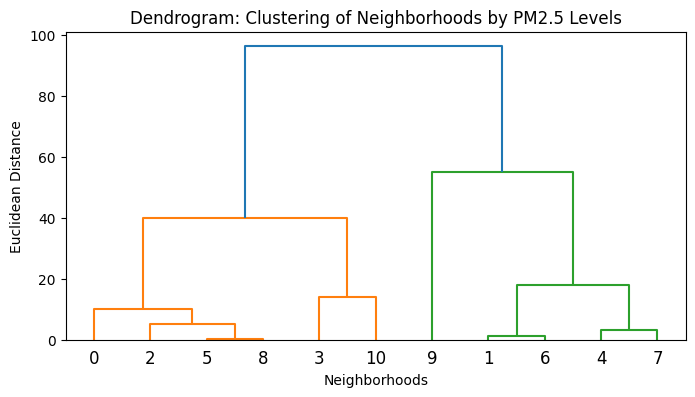

✅ Tree Map and Dendrogram successfully created!


In [ ]:
# ======================================
# Hierarchical Visualization of Air Quality Sensors
# ======================================

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import seaborn as sns

# -----------------------------
# 1️⃣ Simulate Hierarchical Dataset
# -----------------------------
np.random.seed(42)

districts = ['North', 'South', 'East', 'West']
neighborhoods = {
    'North': ['N1', 'N2', 'N3'],
    'South': ['S1', 'S2'],
    'East': ['E1', 'E2', 'E3', 'E4'],
    'West': ['W1', 'W2']
}

data = []
for district, neigh_list in neighborhoods.items():
    for neigh in neigh_list:
        for sensor_id in range(1, np.random.randint(3, 6)):  # 2–5 sensors per neighborhood
            data.append({
                'District': district,
                'Neighborhood': neigh,
                'Sensor_ID': f"{neigh}-S{sensor_id}",
                'PM2.5': np.random.uniform(20, 150)
            })

df = pd.DataFrame(data)

# -----------------------------
# 2️⃣ (a) Tree Map Visualization
# -----------------------------
fig = px.treemap(
    df,
    path=['District', 'Neighborhood', 'Sensor_ID'],
    values='PM2.5',
    color='PM2.5',
    color_continuous_scale='RdYlGn_r',
    title='Hierarchical Tree Map of Air Quality Sensors (District → Neighborhood → Sensor)'
)
fig.show()

# -----------------------------
# 3️⃣ (b) Dendrogram Visualization (Optional)
# -----------------------------
# Pivot the data to create a matrix for clustering
pivot_df = df.pivot_table(index='Neighborhood', values='PM2.5', aggfunc='mean')

# Perform hierarchical clustering
plt.figure(figsize=(8, 4))
dendrogram = sch.dendrogram(sch.linkage(pivot_df, method='ward'))
plt.title("Dendrogram: Clustering of Neighborhoods by PM2.5 Levels")
plt.xlabel("Neighborhoods")
plt.ylabel("Euclidean Distance")
plt.show()

print("✅ Tree Map and Dendrogram successfully created!")


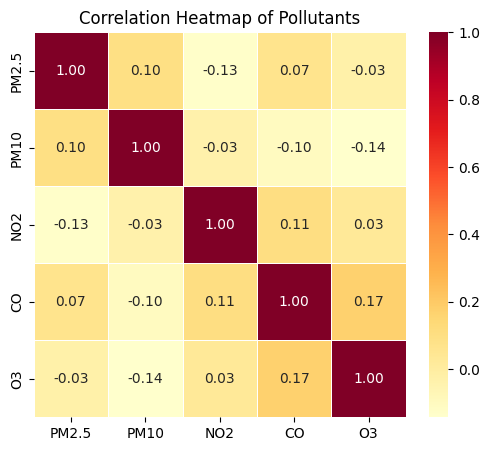

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

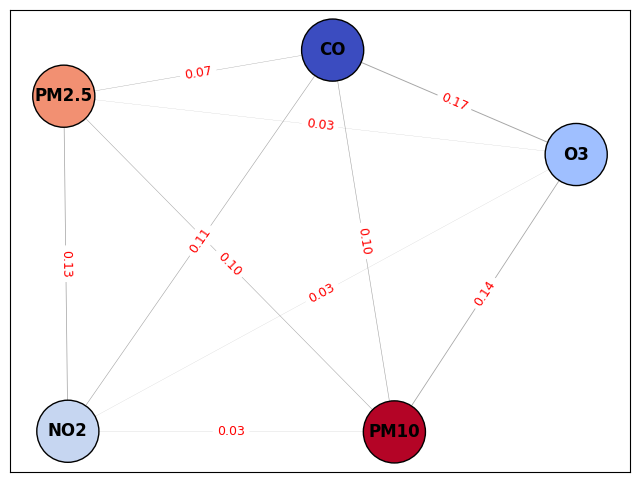

In [ ]:
# ============================================================
# Network Graph of Pollutant Correlations (Fully Connected)
# ============================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

# -----------------------------
# 1️⃣ Create Simulated Dataset
# -----------------------------
np.random.seed(42)
n = 200

df = pd.DataFrame({
    'PM2.5': np.random.normal(80, 20, n).clip(10, 200),
    'PM10': np.random.normal(100, 25, n).clip(15, 250),
    'NO2': np.random.normal(45, 15, n).clip(5, 120),
    'CO': np.random.normal(1.2, 0.3, n).clip(0.1, 3.0),
    'O3': np.random.normal(30, 12, n).clip(5, 100)
})

# -----------------------------
# 2️⃣ Correlation Matrix
# -----------------------------
corr_matrix = df.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pollutants")
plt.show()

# -----------------------------
# 3️⃣ Build Fully Connected Network Graph
# -----------------------------
G = nx.Graph()

# Add all pollutants as nodes
for pollutant in corr_matrix.columns:
    G.add_node(pollutant)

# Add all edges (fully connected graph)
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j:
            G.add_edge(i, j, weight=abs(corr_matrix.loc[i, j]))

# -----------------------------
# 4️⃣ Visualize the Network Graph
# -----------------------------
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)

# Node color based on mean pollutant concentration
node_color_map = [df[col].mean() for col in G.nodes]
nodes = nx.draw_networkx_nodes(
    G, pos, node_color=node_color_map, cmap='coolwarm',
    node_size=2000, edgecolors='black'
)

# Edge thickness = correlation strength
edges = G.edges(data=True)
weights = [4 * d['weight'] for (u, v, d) in edges]

nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, edge_color='gray', alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Edge labels (correlation values)
edge_labels = {(u, v): f"{d['weight']:.2f}" for (u, v, d) in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=9)

# Add colorbar for node values
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=min(node_color_map), vmax=max(node_color_map)))
cbar = plt.colorbar(sm)
cbar.set_label('Average Pollutant Concentration (µg/m³)')

plt.title("Connected Network Graph of Pollutant Correlations", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

print("✅ Connected network graph and heatmap successfully generated!")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


✅ Sample Complaints Loaded:
                                           Complaint
0  There is too much smoke from nearby factories ...
1  Heavy traffic is making the air dusty and poll...
2  I smell chemicals in the air near the industri...
3  The construction sites are spreading dust ever...
4  Vehicles emit black smoke and the air feels th...

✅ TF-IDF Vector Space Representation:
        air  better     black  breathing  burning  cars   causing  chemicals  \
0  0.000000     0.0  0.000000   0.418024      0.0   0.0  0.418024   0.000000   
1  0.233444     0.0  0.000000   0.000000      0.0   0.0  0.000000   0.000000   
2  0.246743     0.0  0.000000   0.000000      0.0   0.0  0.000000   0.459631   
3  0.000000     0.0  0.000000   0.000000      0.0   0.0  0.000000   0.000000   
4  0.224195     0.0  0.417629   0.000000      0.0   0.0  0.000000   0.000000   

   city  construction  ...  sites     smell  smog     smoke  spreading  \
0   0.0           0.0  ...    0.0  0.000000   0.0  0.355359 

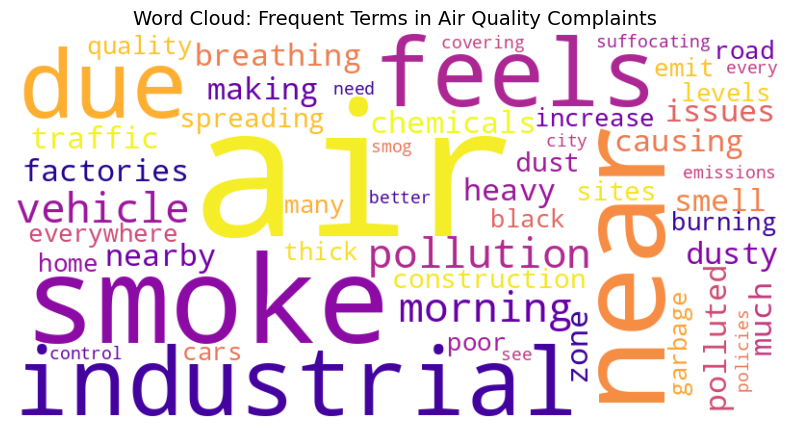

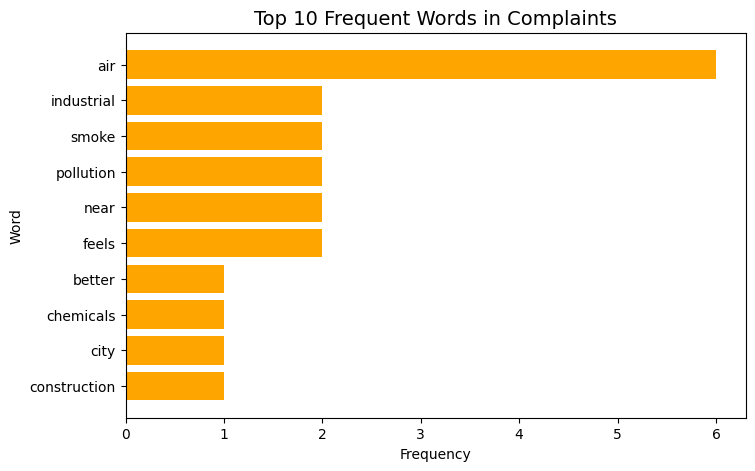

✅ Word cloud and bar chart generated successfully!


In [ ]:
# =====================================================
# Citizen Complaint Analysis on Air Quality (Text Mining)
# =====================================================

# Install necessary packages (if running first time in Colab)
!pip install wordcloud scikit-learn matplotlib pandas nltk --quiet

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# -----------------------------
# 1️⃣ Simulate Sample Citizen Complaints Dataset
# -----------------------------
data = {
    'Complaint': [
        "There is too much smoke from nearby factories causing breathing issues.",
        "Heavy traffic is making the air dusty and polluted.",
        "I smell chemicals in the air near the industrial zone.",
        "The construction sites are spreading dust everywhere.",
        "Vehicles emit black smoke and the air feels thick in the mornings.",
        "Air quality is very poor due to burning of garbage.",
        "Too many cars on the road increase air pollution levels.",
        "The air near my home feels suffocating due to vehicle emissions.",
        "We need better policies to control industrial pollution.",
        "I can see smog covering the city every morning."
    ]
}

df = pd.DataFrame(data)
print("✅ Sample Complaints Loaded:")
print(df.head())

# -----------------------------
# 2️⃣ (a) Convert Text to Vector Space (TF-IDF Representation)
# -----------------------------
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Complaint'])
feature_names = vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
print("\n✅ TF-IDF Vector Space Representation:")
print(tfidf_df.head())

# -----------------------------
# 3️⃣ (b) Create Word Cloud (Most Frequent Words)
# -----------------------------
text_all = " ".join(df['Complaint']).lower()
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stop_words, colormap='plasma').generate(text_all)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Frequent Terms in Air Quality Complaints", fontsize=14)
plt.show()

# -----------------------------
# 4️⃣ Create Bar Chart of Top 10 Frequent Words
# -----------------------------
vectorizer_count = CountVectorizer(stop_words='english')
word_count = vectorizer_count.fit_transform(df['Complaint'])
word_freq = pd.DataFrame({'Word': vectorizer_count.get_feature_names_out(),
                          'Count': word_count.toarray().sum(axis=0)})

top_words = word_freq.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(top_words['Word'], top_words['Count'], color='orange')
plt.gca().invert_yaxis()
plt.title("Top 10 Frequent Words in Complaints", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

print("✅ Word cloud and bar chart generated successfully!")


In [ ]:
# ============================================================
# Visualizing PM2.5 Measurements on a City Map using Folium
# ============================================================

# Install necessary library
!pip install folium pandas --quiet

import folium
import pandas as pd
import numpy as np

# -----------------------------
# 1️⃣ Simulate Sample Sensor Data
# -----------------------------
np.random.seed(42)
num_sensors = 15

data = {
    'Sensor_ID': [f'Sensor_{i+1}' for i in range(num_sensors)],
    'Latitude': np.random.uniform(28.55, 28.75, num_sensors),   # Example: Delhi region
    'Longitude': np.random.uniform(77.10, 77.35, num_sensors),
    'PM2.5': np.random.randint(30, 180, num_sensors)
}

df = pd.DataFrame(data)
print("✅ Sample Sensor Data:")
print(df.head())

# -----------------------------
# 2️⃣ Define Color Function for PM2.5 Level
# -----------------------------
def get_color(pm25):
    if pm25 <= 50:
        return 'green'
    elif pm25 <= 100:
        return 'orange'
    elif pm25 <= 150:
        return 'red'
    else:
        return 'darkred'

# -----------------------------
# 3️⃣ Create Base City Map
# -----------------------------
city_center = [df['Latitude'].mean(), df['Longitude'].mean()]
city_map = folium.Map(location=city_center, zoom_start=12)

# -----------------------------
# 4️⃣ Add Sensor Points to Map
# -----------------------------
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=8,
        color=get_color(row['PM2.5']),
        fill=True,
        fill_color=get_color(row['PM2.5']),
        fill_opacity=0.8,
        popup=f"Sensor: {row['Sensor_ID']}<br>PM2.5: {row['PM2.5']} µg/m³"
    ).add_to(city_map)

# -----------------------------
# 5️⃣ Display Interactive Map
# -----------------------------
city_map.save("pm25_city_map.html")
city_map


✅ Sample Sensor Data:
  Sensor_ID   Latitude  Longitude  PM2.5
0  Sensor_1  28.624908  77.145851     80
1  Sensor_2  28.740143  77.176061    164
2  Sensor_3  28.696399  77.231189     50
3  Sensor_4  28.669732  77.207986    102
4  Sensor_5  28.581204  77.172807     47


In [ ]:
# Run this entire cell in Google Colab.

# 1) Install folium (quiet)
!pip install folium --quiet

# 2) Imports
import folium
import pandas as pd
import numpy as np
from IPython.core.display import HTML, display

# 3) Simulate sample road/flow data
np.random.seed(42)
roads = ['Main Street', 'Industrial Road', 'Market Avenue', 'Ring Road', 'River Drive']
start_lat = np.random.uniform(28.55, 28.70, len(roads))
start_lon = np.random.uniform(77.10, 77.25, len(roads))
end_lat = start_lat + np.random.uniform(0.01, 0.03, len(roads))
end_lon = start_lon + np.random.uniform(0.01, 0.03, len(roads))
traffic_flow = np.random.randint(50, 300, len(roads))  # sample flow levels

df = pd.DataFrame({
    'Road': roads,
    'Start_Lat': start_lat,
    'Start_Lon': start_lon,
    'End_Lat': end_lat,
    'End_Lon': end_lon,
    'Flow_Level': traffic_flow
})

print("Sample Road Flow Data:")
display(df)

# 4) Color function for flow intensity
def get_flow_color(flow):
    if flow < 100:
        return 'green'
    elif flow < 200:
        return 'orange'
    elif flow < 250:
        return 'red'
    else:
        return 'darkred'

# 5) Compute map center (mean of all points)
lat_mean = pd.concat([df['Start_Lat'], df['End_Lat']]).mean()
lon_mean = pd.concat([df['Start_Lon'], df['End_Lon']]).mean()
city_center = [float(lat_mean), float(lon_mean)]

# 6) Create Folium map
m = folium.Map(location=city_center, zoom_start=12, tiles='OpenStreetMap')

# 7) Add flow lines and popups
for _, row in df.iterrows():
    start = [float(row['Start_Lat']), float(row['Start_Lon'])]
    end   = [float(row['End_Lat']),   float(row['End_Lon'])]
    points = [start, end]
    folium.PolyLine(
        points,
        color=get_flow_color(int(row['Flow_Level'])),
        weight=6,
        opacity=0.8,
        popup=f"{row['Road']} — Flow: {int(row['Flow_Level'])}"
    ).add_to(m)
    # optional markers for start/end
    folium.CircleMarker(location=start, radius=4, color='blue', fill=True, fill_opacity=0.7,
                        popup=f"{row['Road']} (start)").add_to(m)
    folium.CircleMarker(location=end, radius=4, color='black', fill=True, fill_opacity=0.7,
                        popup=f"{row['Road']} (end)").add_to(m)

# 8) Save the map as HTML (optional) and display inline
out_html = "traffic_flow_map.html"
m.save(out_html)
print(f"Saved interactive map to: {out_html}")

# This displays the interactive folium map inside Colab output:
display(HTML(m._repr_html_()))


Sample Road Flow Data:


,Road,Start_Lat,Start_Lon,End_Lat,End_Lon,Flow_Level
0,Main Street,28.606181,77.123399,28.616593,77.137067,108
1,Industrial Road,28.692607,77.108713,28.722005,77.124797,219
2,Market Avenue,28.659799,77.229926,28.686448,77.250422,269
3,Ring Road,28.639799,77.190167,28.654046,77.208806,237
4,River Drive,28.573403,77.206211,28.587039,77.222035,257


Saved interactive map to: traffic_flow_map.html


In [ ]:
# ===============================
# PM2.5 Heatmap by District
# ===============================
# Run this entire cell in Google Colab

# Install dependencies
!pip install folium geopandas --quiet

import pandas as pd
import folium
from folium.plugins import HeatMap
import numpy as np

# -----------------------------
# 1. Simulate district-level PM2.5 data
# -----------------------------
np.random.seed(42)
districts = ['North', 'South', 'East', 'West', 'Central']
lat = [28.70, 28.50, 28.60, 28.55, 28.65]
lon = [77.10, 77.20, 77.30, 77.25, 77.15]
pm25 = np.random.randint(40, 200, len(districts))

df = pd.DataFrame({
    'District': districts,
    'Latitude': lat,
    'Longitude': lon,
    'PM2.5': pm25
})

print("Sample District PM2.5 Data:")
display(df)

# -----------------------------
# 2. Create a Folium map
# -----------------------------
city_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=city_center, zoom_start=11, tiles='CartoDB positron')

# -----------------------------
# 3. Add HeatMap layer
# -----------------------------
heat_data = [[row['Latitude'], row['Longitude'], row['PM2.5']] for index, row in df.iterrows()]
HeatMap(heat_data, radius=35, blur=25, max_zoom=13).add_to(m)

# Add markers for clarity
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=6,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        popup=f"{row['District']}: {row['PM2.5']} µg/m³"
    ).add_to(m)

# -----------------------------
# 4. Display interactive map in Colab
# -----------------------------
from IPython.display import HTML, display
display(HTML(m._repr_html_()))


Sample District PM2.5 Data:


,District,Latitude,Longitude,PM2.5
0,North,28.70,77.10,142
1,South,28.50,77.20,132
2,East,28.60,77.30,54
3,West,28.55,77.25,146
4,Central,28.65,77.15,111


In [ ]:
# ===========================================
# Animated Visualization: Hourly PM2.5 Changes
# ===========================================
# Run this cell in Google Colab

# 1) Install dependencies
!pip install folium pandas numpy --quiet

# 2) Imports
import folium
from folium.plugins import HeatMapWithTime
import pandas as pd
import numpy as np
from IPython.display import HTML, display

# 3) Simulate hourly PM2.5 data for 5 sensors over 24 hours
np.random.seed(42)
sensors = ['S1', 'S2', 'S3', 'S4', 'S5']
latitudes = np.random.uniform(28.55, 28.70, len(sensors))
longitudes = np.random.uniform(77.10, 77.30, len(sensors))

hours = pd.date_range("2025-10-26 00:00", periods=24, freq='H')
data = []

for hour in hours:
    pm25 = np.random.randint(40, 200, len(sensors))
    df = pd.DataFrame({
        'Sensor': sensors,
        'Latitude': latitudes,
        'Longitude': longitudes,
        'PM2.5': pm25,
        'Hour': hour
    })
    data.append(df)

# Combine all hours into one DataFrame
all_data = pd.concat(data)
print("Sample of Hourly Air Quality Data:")
display(all_data.head())

# 4) Prepare heatmap data for each hour
heat_data = []
for hour in hours:
    subset = all_data[all_data['Hour'] == hour]
    heat_data.append(subset[['Latitude', 'Longitude', 'PM2.5']].values.tolist())

# 5) Create a Folium base map
city_center = [all_data['Latitude'].mean(), all_data['Longitude'].mean()]
m = folium.Map(location=city_center, zoom_start=12, tiles='CartoDB positron')

# 6) Add animated heatmap layer
HeatMapWithTime(
    data=heat_data,
    index=[t.strftime("%H:%M") for t in hours],
    radius=25,
    auto_play=True,
    max_opacity=0.8
).add_to(m)

# 7) Display the interactive animation inline
display(HTML(m._repr_html_()))


Sample of Hourly Air Quality Data:


/tmp/ipython-input-4206779709.py:22: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



,Sensor,Latitude,Longitude,PM2.5,Hour
0,S1,28.606181,77.131199,189,2025-10-26
1,S2,28.692607,77.111617,92,2025-10-26
2,S3,28.659799,77.273235,41,2025-10-26
3,S4,28.639799,77.220223,127,2025-10-26
4,S5,28.573403,77.241615,197,2025-10-26


Sample PM2.5 Time Series Data:


,Date,PM2.5
0,2024-10-25 18:52:25.611604,37.756727
1,2024-10-26 18:52:25.611604,31.628431
2,2024-10-27 18:52:25.611604,39.717445
3,2024-10-28 18:52:25.611604,48.708273
4,2024-10-29 18:52:25.611604,31.381715


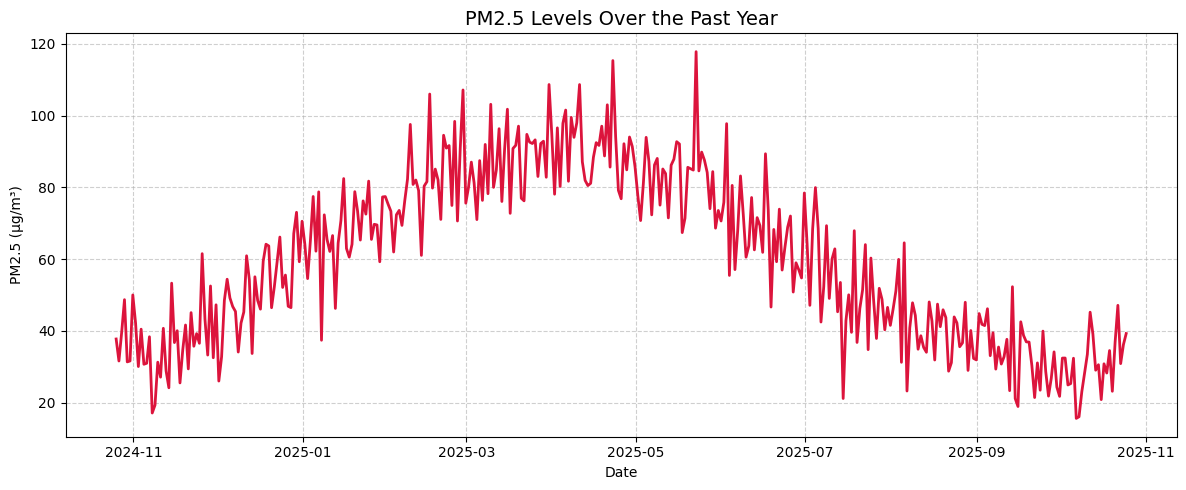

/tmp/ipython-input-1573748085.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




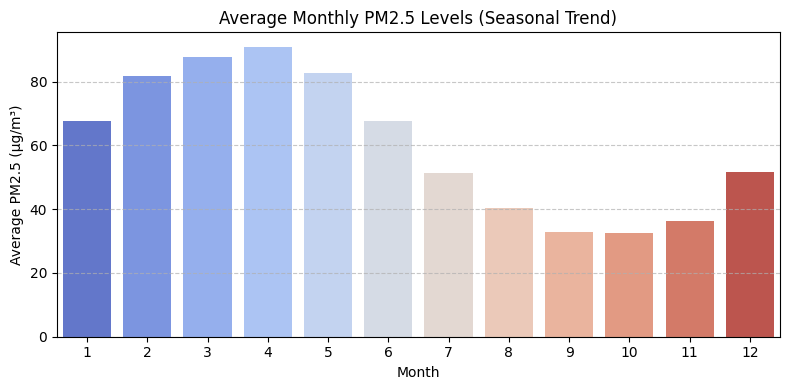

In [ ]:
# ===========================================
# Time-Series Plot of PM2.5 (Past Year)
# ===========================================
# Run this cell in Google Colab

# 1) Install dependencies
!pip install pandas matplotlib seaborn --quiet

# 2) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# 3) Simulate one year of daily PM2.5 data
np.random.seed(42)
dates = pd.date_range(datetime.now() - timedelta(days=365), periods=365)
# Create a sinusoidal pattern + noise to mimic seasonal variation
pm25 = 60 + 30*np.sin(2 * np.pi * dates.dayofyear / 365) + np.random.normal(0, 10, 365)

df = pd.DataFrame({'Date': dates, 'PM2.5': pm25})

print("Sample PM2.5 Time Series Data:")
display(df.head())

# 4) Plot time series
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Date', y='PM2.5', color='crimson', linewidth=2)
plt.title("PM2.5 Levels Over the Past Year", fontsize=14)
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 5) Optional: Show monthly averages to highlight seasonal trends
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['PM2.5'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='Month', y='PM2.5', data=monthly_avg, palette='coolwarm')
plt.title("Average Monthly PM2.5 Levels (Seasonal Trend)")
plt.xlabel("Month")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Sample PM2.5 Data with Weekday Info:


,Date,PM2.5,DayOfWeek,IsWeekend
0,2024-10-25 18:59:58.469538,45.833437,Friday,False
1,2024-10-26 18:59:58.469538,40.901268,Saturday,True
2,2024-10-27 18:59:58.469538,47.341881,Sunday,True
3,2024-10-28 18:59:58.469538,54.502889,Monday,False
4,2024-10-29 18:59:58.469538,40.608939,Tuesday,False


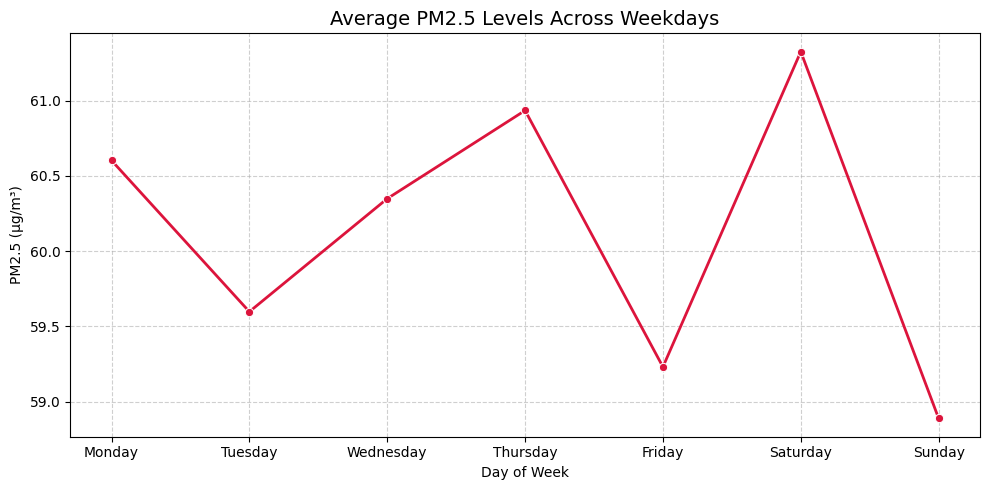

/tmp/ipython-input-1944551874.py:51: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




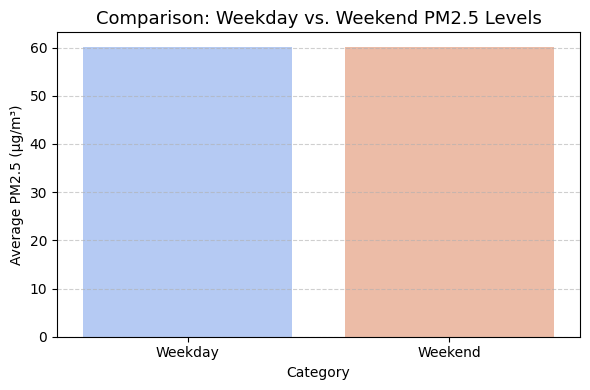

In [ ]:
# =======================================================
# Compare PM2.5 Levels: Weekdays vs. Weekends
# =======================================================
# Run this entire cell in Google Colab

# 1) Install dependencies
!pip install pandas matplotlib seaborn --quiet

# 2) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# 3) Simulate daily PM2.5 data for one year
np.random.seed(42)
dates = pd.date_range(datetime.now() - timedelta(days=365), periods=365)
pm25 = 60 + 20*np.sin(2 * np.pi * dates.dayofyear / 365) + np.random.normal(0, 8, 365)

df = pd.DataFrame({
    'Date': dates,
    'PM2.5': pm25
})
df['DayOfWeek'] = df['Date'].dt.day_name()
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])

print("Sample PM2.5 Data with Weekday Info:")
display(df.head())

# 4) Calculate average PM2.5 for each weekday
weekday_avg = df.groupby('DayOfWeek')['PM2.5'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

# 5) Plot 1: Line chart
plt.figure(figsize=(10,5))
sns.lineplot(data=weekday_avg, x='DayOfWeek', y='PM2.5', marker='o', color='crimson', linewidth=2)
plt.title("Average PM2.5 Levels Across Weekdays", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 6) Plot 2: Grouped bar chart (Weekdays vs. Weekends)
df['Category'] = np.where(df['IsWeekend'], 'Weekend', 'Weekday')
category_avg = df.groupby('Category')['PM2.5'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=category_avg, x='Category', y='PM2.5', palette='coolwarm')
plt.title("Comparison: Weekday vs. Weekend PM2.5 Levels", fontsize=13)
plt.ylabel("Average PM2.5 (µg/m³)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Sample Data:


,Traffic,Temperature,PM2.5
0,152,14.179944,69.837331
1,229,28.132521,79.234990
2,142,26.195233,62.980581
3,64,16.091837,65.326611
4,156,38.285607,98.490880



Regression Coefficients:
Traffic Coefficient: 0.39
Temperature Coefficient: -0.75
Intercept: 39.89


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



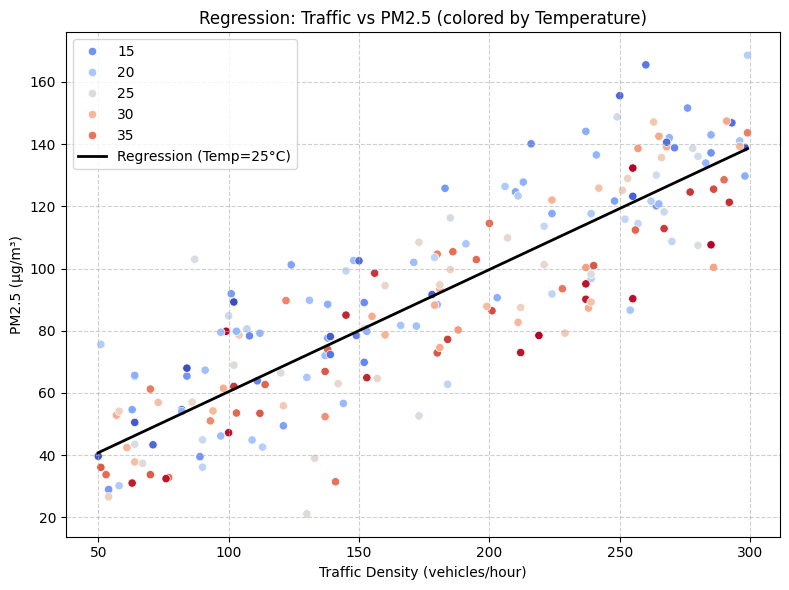

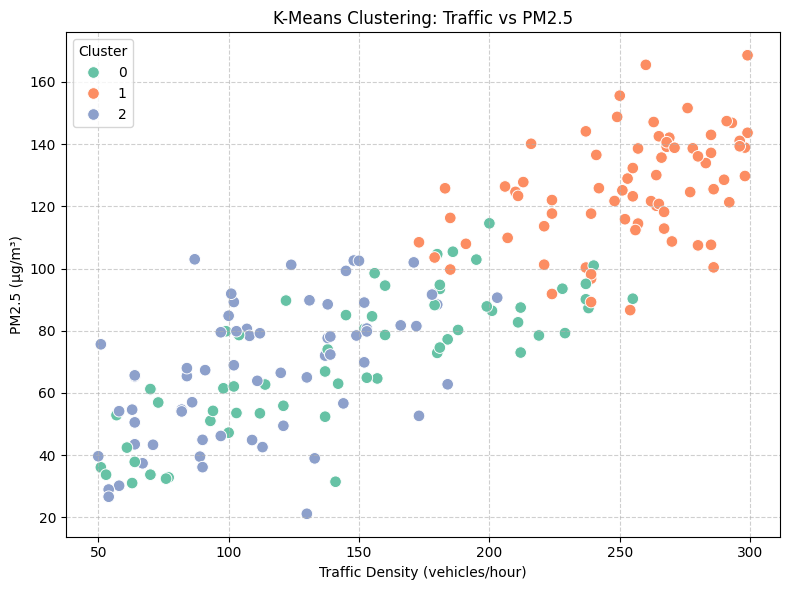

In [ ]:
# ============================================================
# Regression + Clustering of Traffic, Temperature, and PM2.5
# ============================================================
# Run this cell in Google Colab

# 1) Install dependencies
!pip install pandas numpy matplotlib seaborn scikit-learn --quiet

# 2) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 3) Simulate dataset (Traffic, Temperature, PM2.5)
np.random.seed(42)
n = 200
traffic = np.random.randint(50, 300, n)                     # vehicles/hour
temperature = np.random.uniform(10, 40, n)                  # °C
pm25 = 0.4*traffic - 0.8*temperature + np.random.normal(0, 15, n) + 40  # pollutant model

df = pd.DataFrame({
    'Traffic': traffic,
    'Temperature': temperature,
    'PM2.5': pm25
})

print("Sample Data:")
display(df.head())

# ------------------------------------------------------------
# 4) Regression: Predict PM2.5 based on Traffic & Temperature
# ------------------------------------------------------------
X = df[['Traffic', 'Temperature']]
y = df['PM2.5']

model = LinearRegression()
model.fit(X, y)
df['Predicted_PM2.5'] = model.predict(X)

print("\nRegression Coefficients:")
print(f"Traffic Coefficient: {model.coef_[0]:.2f}")
print(f"Temperature Coefficient: {model.coef_[1]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# Scatter + regression surface (2D projection)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Traffic', y='PM2.5', hue='Temperature', palette='coolwarm')
plt.plot(np.sort(df['Traffic']),
         model.predict(np.c_[np.sort(df['Traffic']), np.full_like(np.sort(df['Traffic']), 25)]),
         color='black', linewidth=2, label='Regression (Temp=25°C)')
plt.title("Regression: Traffic vs PM2.5 (colored by Temperature)")
plt.xlabel("Traffic Density (vehicles/hour)")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 5) Clustering: Identify similar pollution patterns
# ------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Traffic', 'Temperature', 'PM2.5']])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Traffic', y='PM2.5', hue='Cluster', palette='Set2', s=70)
plt.title("K-Means Clustering: Traffic vs PM2.5")
plt.xlabel("Traffic Density (vehicles/hour)")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



Sample Data:


,Traffic,Temperature,PM2.5
0,152,26.022683,98.394947
1,229,24.544899,110.478569
2,142,30.773081,72.557453
3,64,18.082370,40.319166
4,156,17.323766,83.527667


R² Score: 0.889
Mean Absolute Error (MAE): 9.40
Root Mean Squared Error (RMSE): 11.78


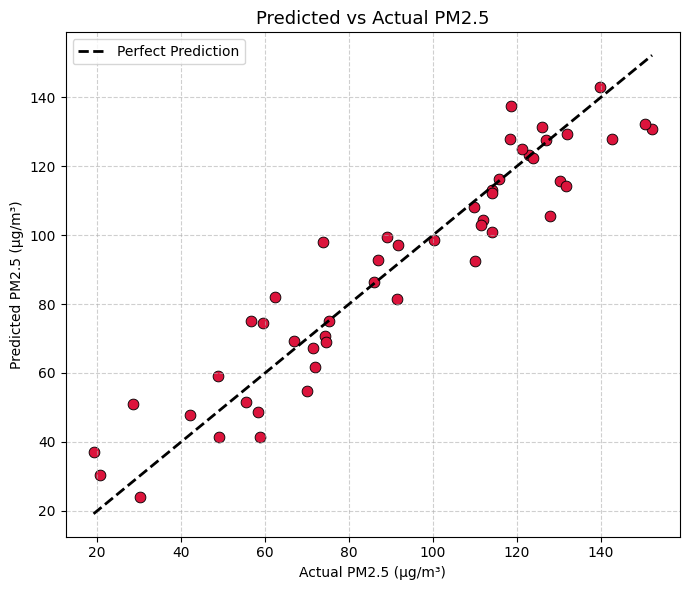

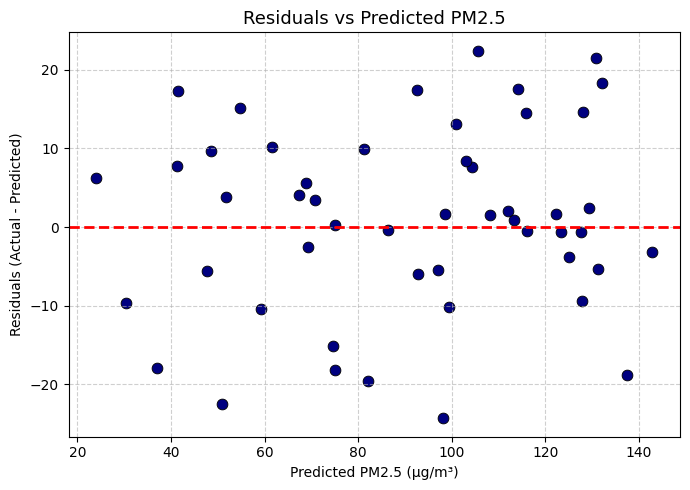

In [ ]:
# ==============================================================
# Evaluate Predictive Model for PM2.5
# ==============================================================

# 1) Install dependencies
!pip install pandas numpy matplotlib seaborn scikit-learn --quiet

# 2) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 3) Simulate dataset (Traffic, Temperature, PM2.5)
np.random.seed(42)
n = 250
traffic = np.random.randint(50, 300, n)
temperature = np.random.uniform(10, 40, n)
pm25 = 0.45*traffic - 0.9*temperature + np.random.normal(0, 12, n) + 30

df = pd.DataFrame({
    'Traffic': traffic,
    'Temperature': temperature,
    'PM2.5': pm25
})

print("Sample Data:")
display(df.head())

# --------------------------------------------------------------
# 4) Train-test split
# --------------------------------------------------------------
X = df[['Traffic', 'Temperature']]
y = df['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------------------------------------------
# 5) Train linear regression model
# --------------------------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --------------------------------------------------------------
# 6) Evaluate performance
# --------------------------------------------------------------
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# --------------------------------------------------------------
# 7) Visualization — Predicted vs Actual
# --------------------------------------------------------------
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, color='crimson', s=60, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.title("Predicted vs Actual PM2.5", fontsize=13)
plt.xlabel("Actual PM2.5 (µg/m³)")
plt.ylabel("Predicted PM2.5 (µg/m³)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --------------------------------------------------------------
# 8) Visualization — Residual Plot
# --------------------------------------------------------------
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals, color='navy', s=60, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs Predicted PM2.5", fontsize=13)
plt.xlabel("Predicted PM2.5 (µg/m³)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
